# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings

# Use filterwarnings() to hide future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Submit request and format output for btc
# btc_url = btc_url + "?format=json"
# Execute request and store data
response_data = requests.get(btc_url).json()
# check btc_url list
print(response_data)
# Fetch current BTC price
# btc_price = response_data["data"]["1"]["quotes"]["CAD"]["price"]
btc_price = response_data['data']['1']['quotes']['CAD']['price']
# Submit request and format output for btc
# eth_url = eth_url + "?format=json"
# Execute request and store data
response_data = requests.get(eth_url).json()
# check btc_url list
# print(response_data)
# Fetch current ETH price
eth_price = response_data["data"]["1027"]["quotes"]["CAD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 19443000, 'total_supply': 19443000, 'max_supply': 21000000, 'quotes': {'USD': {'price': 29292.0, 'volume_24h': 5165933693, 'market_cap': 569568820014, 'percentage_change_1h': -0.0025295077530446, 'percentage_change_24h': 0.0093456525795725, 'percentage_change_7d': -2.20890424620543, 'percent_change_1h': -0.0025295077530446, 'percent_change_24h': 0.0093456525795725, 'percent_change_7d': -2.20890424620543}, 'CAD': {'price': 39793.182, 'volume_24h': 7017920921.9405, 'market_cap': 773759241989.019, 'percent_change_1h': -0.0025295077530446, 'percent_change_24h': 0.0093456525795725, 'percent_change_7d': -2.20890424620543}}, 'last_updated': 1690708497}}, 'metadata': {'timestamp': 1690708497, 'num_cryptocurrencies': 3119, 'error': None}}
The current value of your 1.2 BTC is $47751.82
The current value of your 5.3 ETH is $13491.31


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-07-28", tz="Australia/Melbourne").isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
).df
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-07-28 04:00:00+00:00,97.39,97.59,97.3102,97.56,7667973,27237,97.508638,AGG
2023-07-28 04:00:00+00:00,455.88,457.78,452.4918,456.92,79583623,525115,456.262095,SPY


In [9]:


# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_portfolio[df_portfolio["symbol"]=="SPY"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])
df_portfolio

AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-07-28 04:00:00+00:00  97.39  97.59  97.3102  97.56  7667973       27237   

                                         SPY                            \
                                vwap    open    high       low   close   
timestamp                                                                
2023-07-28 04:00:00+00:00  97.508638  455.88  457.78  452.4918  456.92   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-07-28 04:00:00+00:00  79583623      525115  456.262095

In [10]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.56
Current SPY closing price: $456.92


In [11]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $91384.00
The current value of your 200 AGG shares is $19512.00


### Savings Health Analysis

In [12]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
amount_data = {"amount":[crypto, shares]}
index_data = ["crypto", "shares"]
# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,61243.128089
shares,110896.000000


<Axes: title={'center': 'Personal Savings'}, ylabel='amount'>

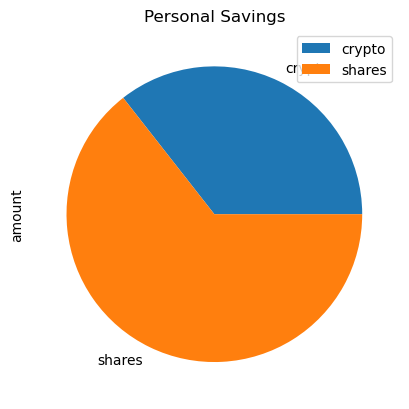

In [13]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health
savings_goal = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund!")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
    
else:
    print(f"You are {savings_goal} dollars away from reaching the goal!")

Congratulations! You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-28', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-07-28', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-07-30 04:00:00+00:00  105.94  106.0500  105.910  105.97  5518246   
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   
2018-08-02 04:00:00+00:00  105.76  105.7600  105.650  105.74  3671901   
2018-08-03 04:00:00+00:00  105.81  105.9799  105.810  105.97  2542872   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2018-07-30 04:00:00+00:00       16829  105.982889  281.51  281.6900  279.3600   
2018-07-31 04:00:00+00:00       21794  106.093910  280.70  282.0200  280.3800   
2018-08-01 04:00:00+00:00       18024  105.682721  281.56  282.1300  280.1315   
2018-08-02 04:00:00+00:00       13787  105.721750  279.39  282.5800  279.1600   
2018-08-03 04:00:00+00:00       11998  105.924304  282.53  283.6577  282.3300   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-07-30 04:00:00+00:00  279.90  64319758      252060  280.290726  
2018-07-31 04:00:00+00:00  281.19  68584293      275208  281.218025  
2018-08-01 04:00:00+00:00  280.89  55015826      244835  281.076175  
2018-08-02 04:00:00+00:00  282.36  63766084      247750  281.496534  
2018-08-03 04:00:00+00:00  283.62  53965986      201724  283.200895

In [17]:
# Set number of simulations
num_sims = 500
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [18]:
# Printing the simulation input data
MC_fiveyears.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-07-30 04:00:00+00:00  105.94  106.0500  105.910  105.97  5518246   
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   
2018-08-02 04:00:00+00:00  105.76  105.7600  105.650  105.74  3671901   
2018-08-03 04:00:00+00:00  105.81  105.9799  105.810  105.97  2542872   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-30 04:00:00+00:00       16829  105.982889          NaN  281.51   
2018-07-31 04:00:00+00:00       21794  106.093910     0.000849  280.70   
2018-08-01 04:00:00+00:00       18024  105.682721    -0.003394  281.56   
2018-08-02 04:00:00+00:00       13787  105.721750     0.000378  279.39   
2018-08-03 04:00:00+00:00       11998  105.924304     0.002175  282.53   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2018-07-30 04:00:00+00:00  281.6900  279.3600  279.90  64319758      252060   
2018-07-31 04:00:00+00:00  282.0200  280.3800  281.19  68584293      275208   
2018-08-01 04:00:00+00:00  282.1300  280.1315  280.89  55015826      244835   
2018-08-02 04:00:00+00:00  282.5800  279.1600  282.36  63766084      247750   
2018-08-03 04:00:00+00:00  283.6577  282.3300  283.62  53965986      201724   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-30 04:00:00+00:00  280.290726          NaN  
2018-07-31 04:00:00+00:00  281.218025     0.004609  
2018-08-01 04:00:00+00:00  281.076175    -0.001067  
2018-08-02 04:00:00+00:00  281.496534     0.005233  
2018-08-03 04:00:00+00:00  283.200895     0.004462

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 110.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 120.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 130.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 140.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 150.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 160.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 170.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 180.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 190.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 200.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 210.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 220.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 230.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 240.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 250.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 260.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 270.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 280.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 290.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 300.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 310.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 320.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 330.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 340.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 350.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 360.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 370.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 380.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 390.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 400.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 410.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 420.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 430.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 440.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 450.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 460.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 470.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 480.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

Running Monte Carlo simulation number 490.


/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/hardyty/Homework-4-Fin-Planning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, w

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011260,0.996807,1.015045,0.996816,1.013044,0.993448,1.000536,0.997100,1.013653,0.997180,...,1.002575,1.012717,1.003307,1.006702,0.985275,0.992342,1.002947,1.000932,1.014212,0.999272
2,1.011702,1.005812,1.024866,1.003461,1.022652,1.002950,1.016839,0.993729,1.015897,1.011539,...,1.000342,1.022981,0.994009,0.992220,0.993087,0.994388,0.993713,0.997808,1.017717,1.022092
3,1.014729,1.003185,1.023612,1.005383,1.016800,1.014532,1.029025,1.000341,1.026950,1.019972,...,0.994671,1.028192,0.987490,1.005197,0.991699,0.993901,0.993244,1.005954,1.032203,1.018740
4,1.012260,0.996752,1.025945,0.996195,1.014583,1.013043,1.024490,1.005650,1.043630,1.041953,...,0.991361,1.034966,0.989177,1.009014,1.001013,0.984294,0.985782,1.011904,1.036964,1.022830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.258472,7.699341,6.787006,4.364960,7.470916,6.485400,23.268646,6.816796,5.702618,4.020068,...,6.964489,3.511241,3.286288,2.917461,2.289758,4.475935,8.898401,3.413285,8.898714,11.058738
7557,11.372831,7.714229,6.772604,4.431674,7.524900,6.478398,23.532766,6.789978,5.686165,4.007978,...,6.930534,3.505904,3.270543,2.902958,2.301819,4.518969,9.031899,3.406814,8.965006,11.013661
7558,11.385963,7.847863,6.703661,4.409203,7.554072,6.529231,23.260682,6.848727,5.709360,3.968671,...,7.024536,3.495014,3.282964,2.910119,2.323477,4.516176,9.150216,3.448852,8.924915,11.137973
7559,11.361645,7.741678,6.687259,4.423275,7.593450,6.542394,23.350103,6.802297,5.724605,3.972080,...,7.036885,3.527487,3.297406,2.868299,2.325143,4.558229,9.191219,3.459222,8.774211,11.187822


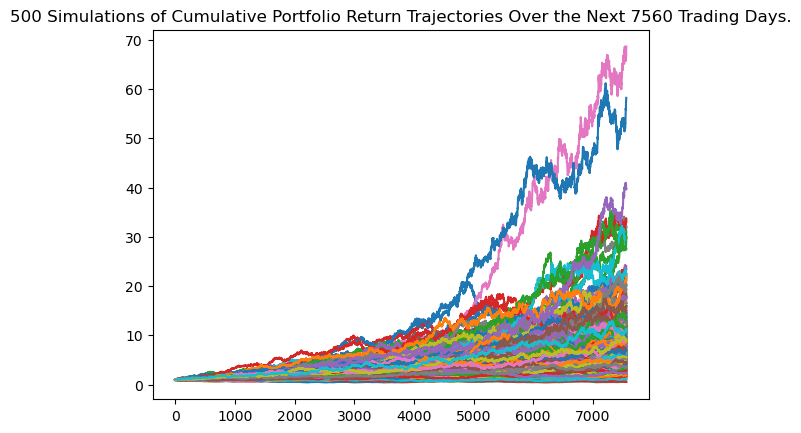

In [20]:
# Plot simulation outcomes
line_plot = MC_fiveyears.plot_simulation()

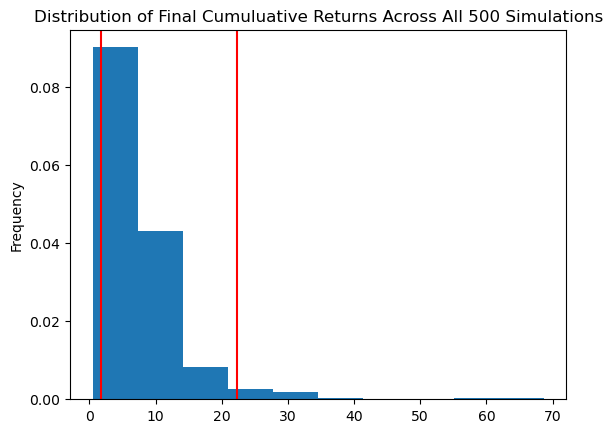

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              7.606832
std               6.442472
min               0.520053
25%               3.745752
50%               5.926548
75%               9.215308
max              68.651491
95% CI Lower      1.718790
95% CI Upper     22.309559
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $34375.8 and $446191.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $51563.7 and $669286.77


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# Set number of simulations
num_sims = 100

MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)


In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyears.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-07-30 04:00:00+00:00  105.94  106.0500  105.910  105.97  5518246   
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   
2018-08-02 04:00:00+00:00  105.76  105.7600  105.650  105.74  3671901   
2018-08-03 04:00:00+00:00  105.81  105.9799  105.810  105.97  2542872   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-30 04:00:00+00:00       16829  105.982889          NaN  281.51   
2018-07-31 04:00:00+00:00       21794  106.093910     0.000849  280.70   
2018-08-01 04:00:00+00:00       18024  105.682721    -0.003394  281.56   
2018-08-02 04:00:00+00:00       13787  105.721750     0.000378  279.39   
2018-08-03 04:00:00+00:00       11998  105.924304     0.002175  282.53   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2018-07-30 04:00:00+00:00  281.6900  279.3600  279.90  64319758      252060   
2018-07-31 04:00:00+00:00  282.0200  280.3800  281.19  68584293      275208   
2018-08-01 04:00:00+00:00  282.1300  280.1315  280.89  55015826      244835   
2018-08-02 04:00:00+00:00  282.5800  279.1600  282.36  63766084      247750   
2018-08-03 04:00:00+00:00  283.6577  282.3300  283.62  53965986      201724   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-30 04:00:00+00:00  280.290726          NaN  
2018-07-31 04:00:00+00:00  281.218025     0.004609  
2018-08-01 04:00:00+00:00  281.076175    -0.001067  
2018-08-02 04:00:00+00:00  281.496534     0.005233  
2018-08-03 04:00:00+00:00  283.200895     0.004462

In [27]:
# Plot simulation outcomes
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995281,0.998339,1.006438,0.999487,1.001931,0.996601,1.004699,0.999274,1.003908,0.991651,...,0.990452,0.992465,1.008115,0.998504,0.995577,1.009983,1.002902,0.988404,1.004465,0.998441
2,0.998288,0.995713,1.006134,1.000321,0.984742,0.986686,0.997298,1.004557,0.998733,0.983726,...,0.994116,0.977191,1.012601,1.009820,0.992129,1.003833,1.005659,0.994445,0.990672,0.994790
3,0.995791,0.979663,1.001312,0.996185,0.980248,0.991237,1.004538,1.014210,1.009875,0.986353,...,0.990354,0.992039,1.008820,1.015868,0.995667,0.994124,1.016590,0.987130,1.002570,0.992863
4,0.990007,0.975698,0.993689,0.992885,0.980831,1.005045,1.014391,1.017959,1.039583,0.981476,...,0.993385,0.995333,1.008041,1.029631,0.984254,0.994731,1.014692,0.996641,0.994372,0.998363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.597383,0.989992,1.406171,1.079523,2.113813,1.381729,1.311295,1.262147,1.302516,0.922123,...,1.945819,1.520153,2.075056,1.283723,1.355065,1.011563,0.945522,2.319383,1.672087,1.779901
1257,1.595128,0.977130,1.424870,1.085205,2.143639,1.380484,1.319886,1.268917,1.303350,0.908724,...,1.968068,1.510304,2.044523,1.291781,1.348015,1.017803,0.951173,2.321030,1.678580,1.776086
1258,1.598320,0.973982,1.429221,1.095318,2.153791,1.364355,1.308890,1.271850,1.304100,0.907780,...,1.969355,1.504875,2.054754,1.282434,1.364853,1.023137,0.952084,2.314190,1.697625,1.767328
1259,1.594553,0.967059,1.424136,1.081449,2.170179,1.363555,1.308154,1.273701,1.293169,0.917212,...,1.947225,1.506769,2.009716,1.293745,1.361921,1.022294,0.946831,2.289034,1.700048,1.750109


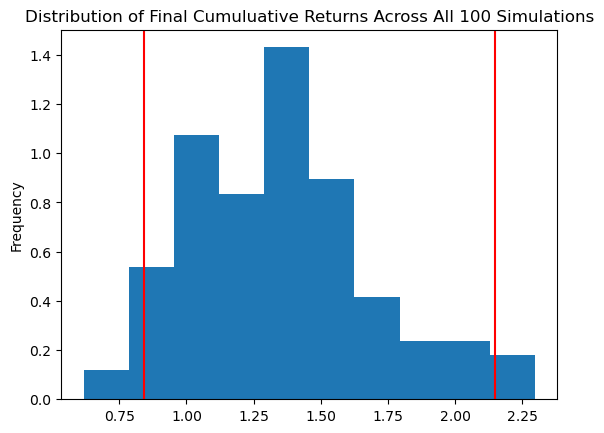

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.359909
std               0.347408
min               0.618418
25%               1.071455
50%               1.333680
75%               1.587592
max               2.296779
95% CI Lower      0.840810
95% CI Upper      2.147120
Name: 1260, dtype: float64


In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8] * initial_investment, 2)
ci_upper_five = round(tbl[9] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16816.21 and $42942.4


### Ten Years Retirement Option

In [31]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# Set number of simulations
num_sims = 100

MC_fiveyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [32]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_fiveyears.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-07-30 04:00:00+00:00  105.94  106.0500  105.910  105.97  5518246   
2018-07-31 04:00:00+00:00  106.11  106.1756  106.050  106.06  5928141   
2018-08-01 04:00:00+00:00  105.55  105.7600  105.512  105.70  4534062   
2018-08-02 04:00:00+00:00  105.76  105.7600  105.650  105.74  3671901   
2018-08-03 04:00:00+00:00  105.81  105.9799  105.810  105.97  2542872   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-30 04:00:00+00:00       16829  105.982889          NaN  281.51   
2018-07-31 04:00:00+00:00       21794  106.093910     0.000849  280.70   
2018-08-01 04:00:00+00:00       18024  105.682721    -0.003394  281.56   
2018-08-02 04:00:00+00:00       13787  105.721750     0.000378  279.39   
2018-08-03 04:00:00+00:00       11998  105.924304     0.002175  282.53   

                                                                             \
                               high       low   close    volume trade_count   
timestamp                                                                     
2018-07-30 04:00:00+00:00  281.6900  279.3600  279.90  64319758      252060   
2018-07-31 04:00:00+00:00  282.0200  280.3800  281.19  68584293      275208   
2018-08-01 04:00:00+00:00  282.1300  280.1315  280.89  55015826      244835   
2018-08-02 04:00:00+00:00  282.5800  279.1600  282.36  63766084      247750   
2018-08-03 04:00:00+00:00  283.6577  282.3300  283.62  53965986      201724   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-30 04:00:00+00:00  280.290726          NaN  
2018-07-31 04:00:00+00:00  281.218025     0.004609  
2018-08-01 04:00:00+00:00  281.076175    -0.001067  
2018-08-02 04:00:00+00:00  281.496534     0.005233  
2018-08-03 04:00:00+00:00  283.200895     0.004462

In [33]:
# Plot simulation outcomes
MC_fiveyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989346,0.998172,0.983506,0.989850,0.989947,0.987564,0.991224,1.006943,1.004775,0.999371,...,0.992435,1.008099,1.026929,1.001156,0.999071,1.019667,0.977284,1.014114,0.997724,0.986433
2,0.982767,1.000630,0.991964,0.983926,0.989816,0.994821,0.995936,1.025032,0.990304,0.996913,...,0.984119,1.008150,1.028727,1.001832,0.996699,1.013422,0.956523,1.028299,0.990116,0.975650
3,0.983187,1.000419,0.996447,0.984771,1.000800,1.000360,1.000198,1.032961,0.976759,0.995201,...,0.983024,0.999554,1.042200,0.998372,1.002058,1.011714,0.957007,1.031211,0.981456,0.969164
4,0.987336,1.005661,0.995079,0.979403,0.993878,1.003182,1.001418,1.034109,0.975517,0.999769,...,0.986507,1.008942,1.035646,0.991547,0.997176,1.020451,0.943911,1.024364,0.980413,0.959785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.245774,2.131809,0.807096,2.373097,2.249510,2.683061,2.629444,1.395728,2.055871,3.084387,...,1.105637,1.565768,3.122821,1.886605,4.049882,2.608894,1.620347,1.335281,1.434282,1.571107
2517,1.245625,2.132014,0.803095,2.391199,2.228936,2.657329,2.642513,1.381310,2.050552,3.107251,...,1.111133,1.572439,3.110143,1.855904,4.047779,2.613948,1.618730,1.344281,1.431069,1.580130
2518,1.256416,2.128031,0.803567,2.407904,2.214593,2.664647,2.657685,1.371071,2.075671,3.108867,...,1.108255,1.588782,3.147562,1.825476,3.987405,2.640522,1.618729,1.360232,1.433504,1.553691
2519,1.265940,2.110799,0.802412,2.413916,2.193517,2.697080,2.661266,1.351552,2.047518,3.120390,...,1.107960,1.580903,3.124402,1.813936,3.966512,2.645712,1.627925,1.373105,1.452217,1.562155


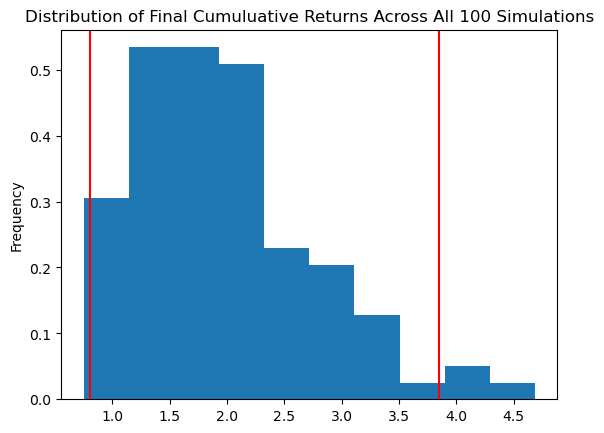

In [34]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyears.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyears.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           100.000000
mean              1.987129
std               0.790525
min               0.751801
25%               1.434186
50%               1.845933
75%               2.406602
max               4.683613
95% CI Lower      0.804031
95% CI Upper      3.843759
Name: 2520, dtype: float64


In [36]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8] * initial_investment, 2)
ci_upper_ten = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $16080.62 and $76875.18
